<a href="https://colab.research.google.com/github/srikharshashi/learn-dl/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [4]:
!nvidia-smi

Thu Apr 27 10:13:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [97]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
type(X_train[0])

numpy.ndarray

9

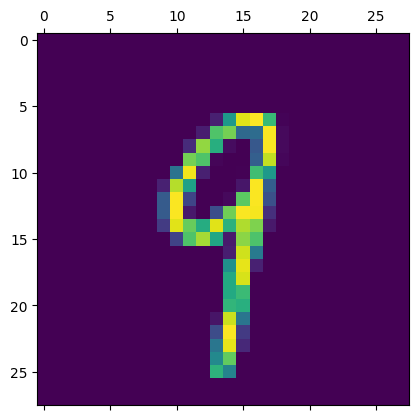

In [13]:
plt.matshow(X_train[900])
y_train[900]

In [36]:
X_trainf=X_train.reshape(len(X_train),28*28)

In [37]:
X_trainf.shape

(60000, 784)

Flatten and Normalize the data

In [40]:
 X_testf=X_test.reshape(len(X_test),28*28)

In [41]:
X_testf.shape

(10000, 784)

In [42]:
X_trainfs=X_trainf/255
X_testfs=X_testf/255

Define and train a model

In [44]:
# This is a sort of a stack 
model=keras.Sequential([
    keras.Input(shape=(784,0)),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

model.fit(X_trainfs,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1883 - accuracy: 0.5910
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9775 - accuracy: 0.7029
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7910 - accuracy: 0.7407
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6270 - accuracy: 0.7624
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4840 - accuracy: 0.7756
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3602 - accuracy: 0.7866
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2535 - accuracy: 0.7988
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1614 - accuracy: 0.8082
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0821 - accuracy: 0.8148
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.013

In [45]:
model.evaluate(X_testfs,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6274 - accuracy: 0.8686


[0.6274451017379761, 0.8686000108718872]

In [47]:
y_pred=model.predict(X_testfs)

313/313 [==============================] - 1s 2ms/step


Test with the 200th sample in predicted images

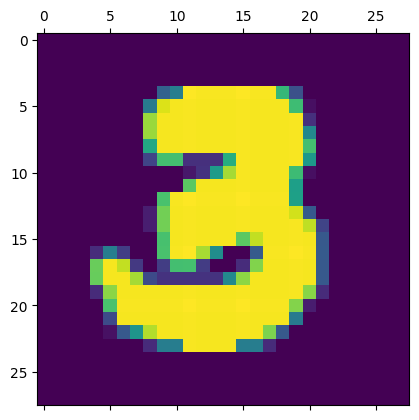

In [59]:
plt.matshow(X_test[200].reshape(28,28))

In [48]:
y_test[200]

3

In [60]:
y_pred[200][3]

0.92091244

In [61]:
np.argmax(y_pred[200])

3

**Evaluate the model** 

In [69]:
y_test.shape


(10000,)

In [70]:
y_pred.shape

(10000, 10)

In [76]:
y_pred_mod=[np.argmax(i) for i in y_pred]
y_pred_mod[:5]

[7, 2, 1, 0, 4]

In [79]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_mod)

Text(95.72222222222221, 0.5, 'Truth')

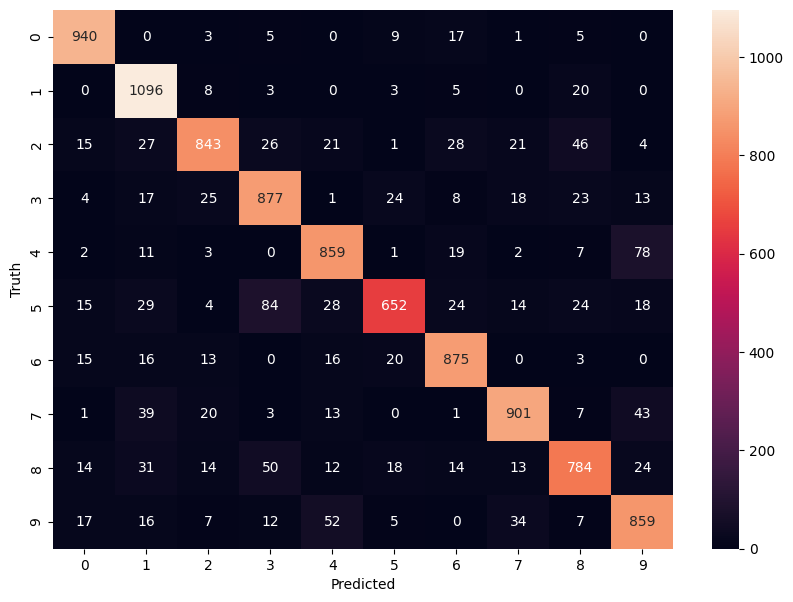

In [81]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [104]:
for img in X_train:
    img=img.reshape(784)
    img=img/255
    img=img.reshape(28,28)

print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [106]:
X_train.shape

(60000, 28, 28)

In [114]:
model2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model2.fit(X_train,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1900 - accuracy: 0.8393
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3928 - accuracy: 0.9019
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2979 - accuracy: 0.9252
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2718 - accuracy: 0.9327
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2409 - accuracy: 0.9402
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2271 - accuracy: 0.9434
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2067 - accuracy: 0.9473
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2051 - accuracy: 0.9504
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1989 - accuracy: 0.9506
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.195

In [84]:
y_pred2=model2.predict(X_testfs)

313/313 [==============================] - 0s 1ms/step


In [85]:
y_pred_mod2=[np.argmax(i) for i in y_pred]
y_pred_mod2[:5]

[7, 2, 1, 0, 4]

In [86]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_mod2)

Text(95.72222222222221, 0.5, 'Truth')

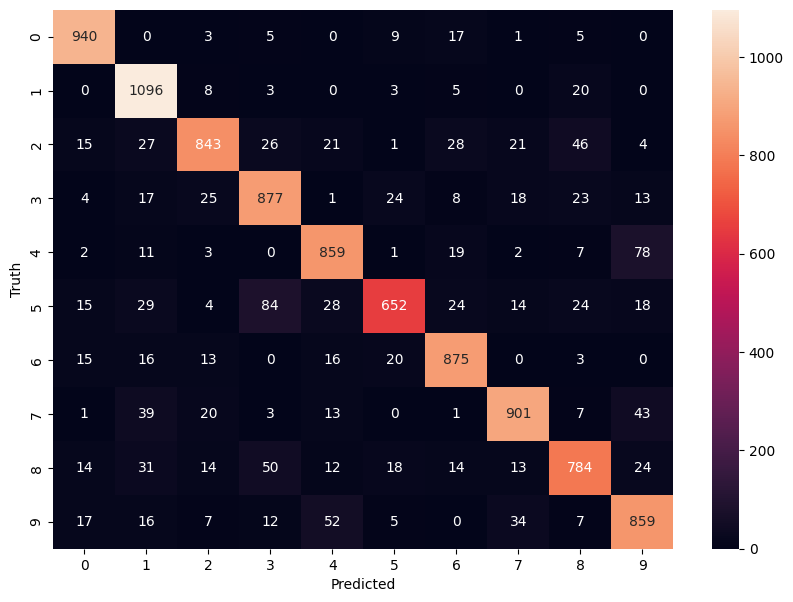

In [87]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')